In [1694]:
train_df <- read.csv("../Data/Titanic_train.csv")
head(train_df, 10) 
tail(train_df)
str(train_df)

# 데이터가 어떤 식으로 되어있는지 잘못 입력된건 없는지 확인해야한다. 
## 항구 팩터가 4개, 이상치가 하나 들어가있다 

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인 
- Survived : 생존 여부 (0 = 사망, 1 = 생존 True/False) / 이상치가 있는지 확인해봐야함 / Target컬럼 / 타켓이 숫자면 랜덤포레스트,SVM은 결과를 숫자로 준다
- Pclass : 티켓 등급  (1 = 1등급 객실, 2 = 2등급 , 3 = 3등급) / 타이타닉의 티켓 등급 확인 , 타이타닉의 구조 확인 (3등급은 출입구가 두 개밖에 없었다) 
    1등급은 작위가 있어야함 상류층, 2등급 작위는 없지만 돈은 많음 중산층, 3등급 서민 /  
    딥러닝에 쓸수 있는 정형데이터가 아직 별로 없다. 현재 이미지 같은 비정형데이터에 주로 사용
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수
- Parch : 함께 탑승한 부모, 자식의 수 
- Fare : 운임, 짐에 대한 비용
- Cabin : 선실, 객실 번호
- Embarked : 탑승 항구 / 3곳 C = Chersbourg 오스트리아 (잘 살았음, 베토벤 시절) , Q = Queenstown 영국 , S = Southampton 영국 (영국은 못 살던 시절)

## 컬럼별로 하나씩 확인 작업

In [1695]:
# 각 컬럼별 NA 확인
head(is.na(train_df))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [1696]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [1697]:
summary(train_df)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [1698]:
# 각 컬럼별 NA 확인하기
sum(is.na(train_df)) # 전체 DF na값 합하기
colSums(is.na(train_df)) # 컬럼별로 na값 합하라!

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [1699]:
177/891 # 전체 데이터 중 na값 비율, 20프로 미만이면 없애도 괜찮다?
891-177 # na값 뺀 데이터의 수

[1] 0.1986532

[1] 714

In [1700]:
# train_df$Age 가 NA인 것을 빼고 데이터셋 만들기
head(subset(train_df, Age != 'NA'))
nrow(subset(train_df, !is.na(Age)))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [1701]:
# Survived 기준으로 Dataset 정렬
library(dplyr)

In [1702]:
train_df <- arrange(train_df,Survived)
print(head(train_df)) # rownames 잘 정렬되어있다.
tail(train_df)

  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [1703]:
# 정렬된 크기 확인하기, dimension
dim(train_df) # 891 행, 12 열

[1] 891  12

### Target Column : Survived 분석 및 확인

In [1704]:
table(train_df$Survived)


  0   1 
549 342 

> 0과 1로만 이루어짐, 1대1 비율은 아님, 

In [1705]:
# Survived의 생존과 사망 Count 확인 및 비율 계산, table or nrow 활용
nrow(subset(train_df, Survived == 0)) # 사망자수
nrow(subset(train_df, Survived == 1)) # 생존자수
# 생존자 수 비율 구하기
round(nrow(subset(train_df, Survived == 1)) / nrow(train_df),2)
# 사망자 수 비율 구하기
round(nrow(subset(train_df, Survived == 0)) / nrow(train_df),2)

[1] 549

[1] 342

[1] 0.38

[1] 0.62

In [1706]:
# target 컬럼은 균등한 비율이 좋고, feature 컬럼은 각각 특징적인 비율이 좋다.

In [1707]:
library(plotrix)

In [1708]:
# 타이타닉호 생존율, pie3D
deathCount <- sum(train_df$Survived == 0); deathCount
liveCount <- sum(train_df$Survived == 1); liveCount
SurvivedVector <- c(deathCount,liveCount); SurvivedVector
ratio <-round(SurvivedVector/sum(SurvivedVector) * 100,2); ratio
label <- paste(c('사망률','생존율'),'\n',ratio,'%'); label

[1] 549

[1] 342

[1] 549 342

[1] 61.62 38.38

[1] "사망률 \n 61.62 %" "생존율 \n 38.38 %"

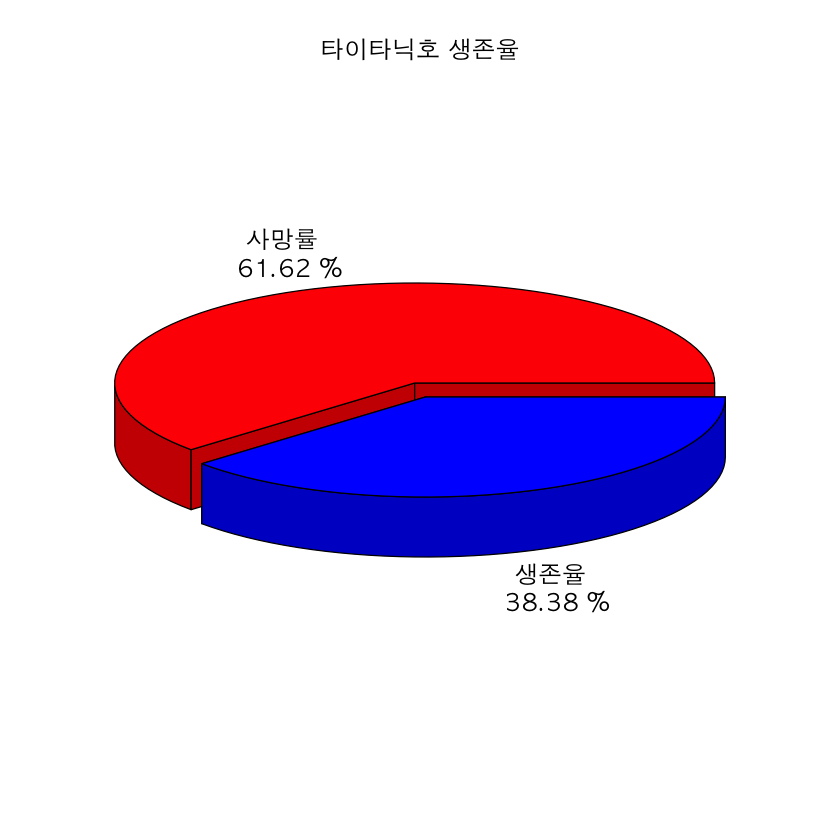

In [1709]:
# 생존과 사망 비율을 pie3D로 생성
options(warn=-1, scipen=100)
par(family='AppleGothic')
pie3D(생존율,
  main='타이타닉호 생존율',
  labels=label,
  explode=0.05, # 쪼개버리기
  labelcex=1.2, # 글자 크기 80%
  col=c('red','blue')
)

> 그래프로 보여주고, 타겟 비율이 다름을 보여주면서 예측율에 반영된다는 점을 알려주기

In [1710]:
deathCount

[1] 549


  0   1 
549 342 

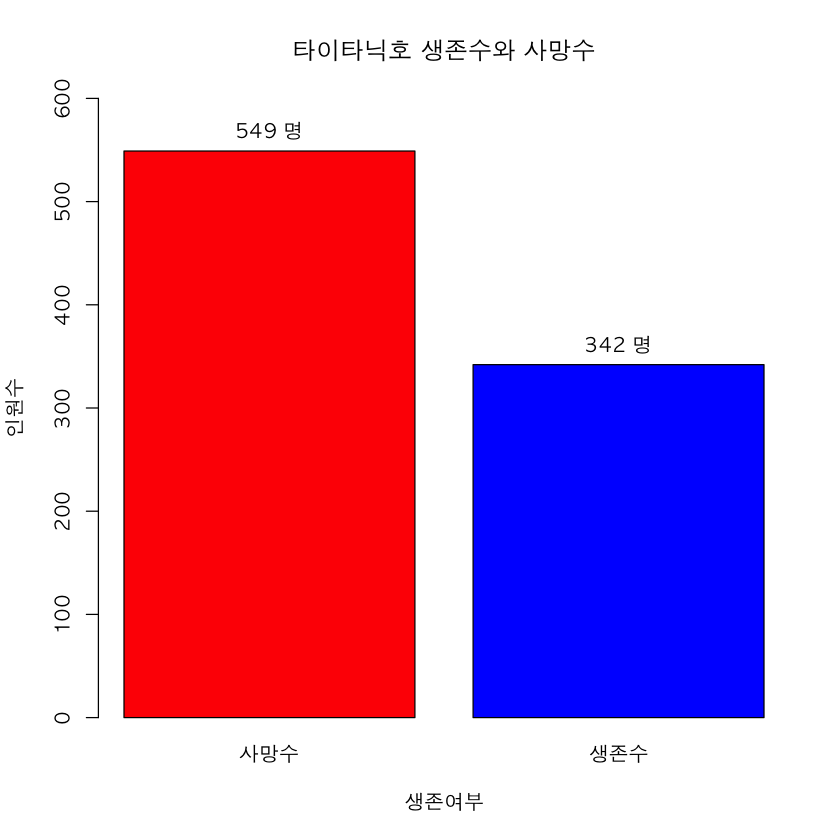

In [1711]:
# 타이타닉호 생존수와 사망수, barplot과 친한 table 활용
#barT1 <- c(deathCount,liveCount); barT1
table(train_df$Survived)

par(family='AppleGothic')
barplot(table(train_df$Survived),
  main='타이타닉호 생존수와 사망수',
  ylim=c(0,600),
  ylab='인원수',
  xlab='생존여부',
  names=c('사망수','생존수'),
  col=c('red','blue')
)

# text 활용하여 수치 막대 위에 기입
for(i in 1:table(train_df$Survived)){
  text(0.7+(i-1)*1.2,table(train_df$Survived)[i]+20,paste(table(train_df$Survived)[i],'명'))  
}

> Target Column으로 Survived를 선정!

---
### Feature Column 찾기

In [1712]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### Sex Column 확인

In [1713]:
# Sex column 분류 확인
unique(train_df$Sex) # 2개뿐이니 써도 좋다

[1] male   female
Levels: female male

In [1714]:
# 여성과 남성의 인원 확인, nrow(subset) 또는 table 활용
table(train_df$Sex)
femaleCount <- table(train_df$Sex)[1]; femaleCount
maleCount <- table(train_df$Sex)[2]; maleCount


female   male 
   314    577 

female 
   314

male 
 577

> Survived 와 얼만큼 특징적인지 확인

In [1715]:
# 여성의 생존수와 사망수
femaleAlive <- nrow(subset(train_df, Sex=='female' & Survived == 1)) # 여성 생존수
femaleDead <- nrow(subset(train_df, Sex=='female' & Survived == 0)) # 여성 사망수


In [1716]:
# 남성의 생존수와 사망수
maleAlive <- nrow(subset(train_df, Sex=='male' & Survived == 1)) # 남성 생존수
maleDead <- nrow(subset(train_df, Sex=='male' & Survived == 0)) # 남성 사망수


In [1717]:
femaleAD <- c(femaleDead,femaleAlive)
maleAD <- c(maleDead,maleAlive)
label1 = paste(c('여성 사망률','여성 생존율'),'\n',c(round(femaleDead/sum(femaleAD)*100,2),round(femaleAlive/sum(femaleAD)*100,2)),'%')
label2 = paste(c('남성 사망률','남성 생존율'),'\n',c(round(maleDead/sum(maleAD)*100,2),round(maleAlive/sum(maleAD)*100,2)),'%')

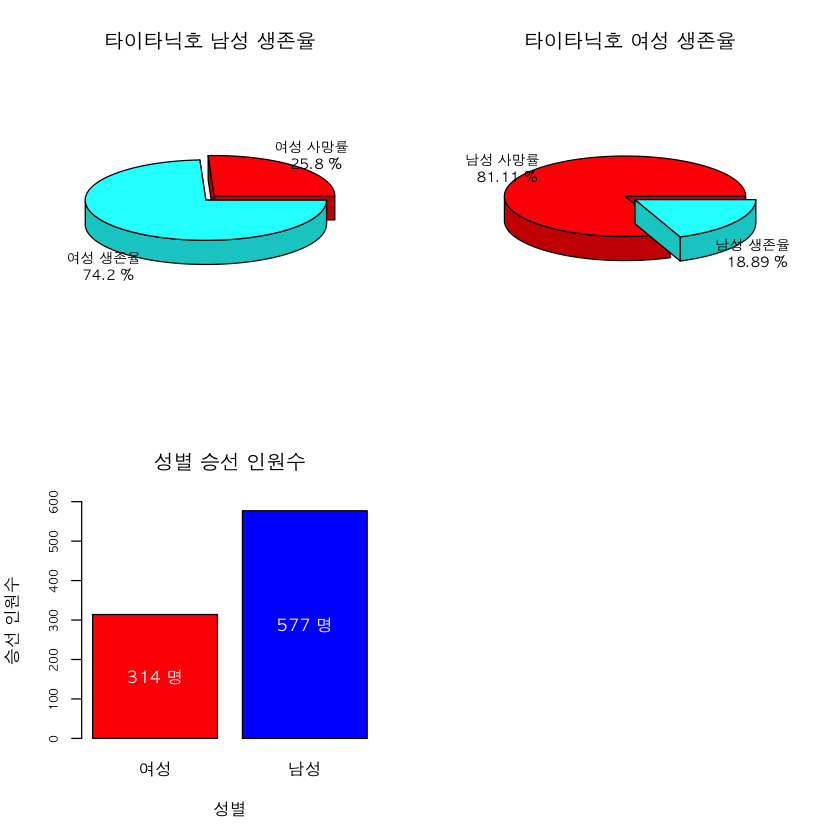

In [1718]:
par(family='AppleGothic',mfrow=c(2,2))
pie3D(femaleAD,
  main='타이타닉호 남성 생존율',
  labels=label1,
  explode=0.05, # 쪼개버리기
  labelcex=0.7, # 글자 크기 
)
pie3D(maleAD,
  main='타이타닉호 여성 생존율',
  labels=label2,
  explode=0.05, # 쪼개버리기
  labelcex=0.7, # 글자 크기
)

# 성별 승선 인원수
barplot(table(train_df$Sex),
  main='성별 승선 인원수',
  ylim=c(0,600),
  ylab='승선 인원수',
  xlab='성별',
  names=c('여성','남성'),
  col=c('red','blue'),
  axes=FALSE # 눈금 없애주기
)
axis(2,cex.axis=0.7) # y축 눈금 입력하기

# text 활용하여 수치 막대 위에 기입
for(i in 1:unique(train_df$Sex)){
  text(0.7+(i-1)*1.2,table(train_df$Sex)[i]/2,paste(table(train_df$Sex)[i],'명'),col='white')
}

> Sex 컬럼은 Feature로 적합<br>
> [Survived] <- [Sex]

In [1719]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### 티켓 등급 분석

In [1720]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [1721]:
# 1등 객실의 여성 생존율
pa <- nrow(subset(train_df, Sex=='female' & Survived == 1 & Pclass == 1)) # 1등 객실, 여성, 생존자 수
# table(train_df$Pclass==1 & train_df$Sex=='female' & train_df$Survived==1)
pb <- nrow(subset(train_df, Sex=='female' & Pclass == 1)) # 1등 객실, 여성 수
pc <- round(pa/pb*100,2)
paste('1등 객실의 여성 생존율은',pa,'/',pb,',',pc,'% 입니다.')

[1] "1등 객실의 여성 생존율은 91 / 94 , 96.81 % 입니다."

In [1722]:
# 1~3 등 객실 여성 생존율 각각 구하기, for문
for(i in 1:nrow(table(train_df$Pclass))){
  pa[i] <- nrow(subset(train_df, Sex=='female' & Survived == 1 & Pclass == i)) # 1등 객실, 여성, 생존자 수
  pb[i] <- nrow(subset(train_df, Sex=='female' & Pclass == i)) # 1등 객실, 여성 수
  pc[i] <- round(pa[i]/pb[i]*100,2)
cat(paste(i,'등 객실의 여성 생존율은',pa[i],'/',pb[i],',',pc[i],'% 입니다.','\n'))
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 입니다. 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 입니다. 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 입니다. 


In [1813]:
# 1~3 등 객실 남성여성 생존율 각각 구하기, for문
#rownames(table(train_df$Sex))
unique(train_df$Sex)
gender <- c('남성','여성') # ifelse 조건문 써도 되긴 함
pd <- c()
pe <- c()
for(j in 1:length(unique(train_df$Sex))){
  for(i in 1:nrow(table(train_df$Pclass))){
    pa[i] <- nrow(subset(train_df, Sex==unique(train_df$Sex)[j] & Survived == 1 & Pclass == i)) # 1등 객실, 여성, 생존자 수
    pb[i] <- nrow(subset(train_df, Sex==unique(train_df$Sex)[j] & Pclass == i)) # 1등 객실, 여성 수
    pc[i] <- round(pa[i]/pb[i]*100,2)
    pd <- append(pd,pc[i])
    pe <- append(pe,paste(i,'등 객실',gender[j]))
  cat(paste(i,'등 객실의',gender[j],'생존율은',pa[i],'/',pb[i],',',pc[i],'% 입니다.','\n'))
  }
  cat('------------------------------------------------------\n')
}
class(pd)
pd <- as.data.frame(pd)
pd <- arrange(pd,desc(pd))
pd
pe


[1] male   female
Levels: female male

1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 입니다. 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 입니다. 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 입니다. 
------------------------------------------------------
1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 입니다. 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 입니다. 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 입니다. 
------------------------------------------------------


[1] "numeric"

pd
96.81
92.11
50.00
36.89
15.74
13.54


[1] "character"

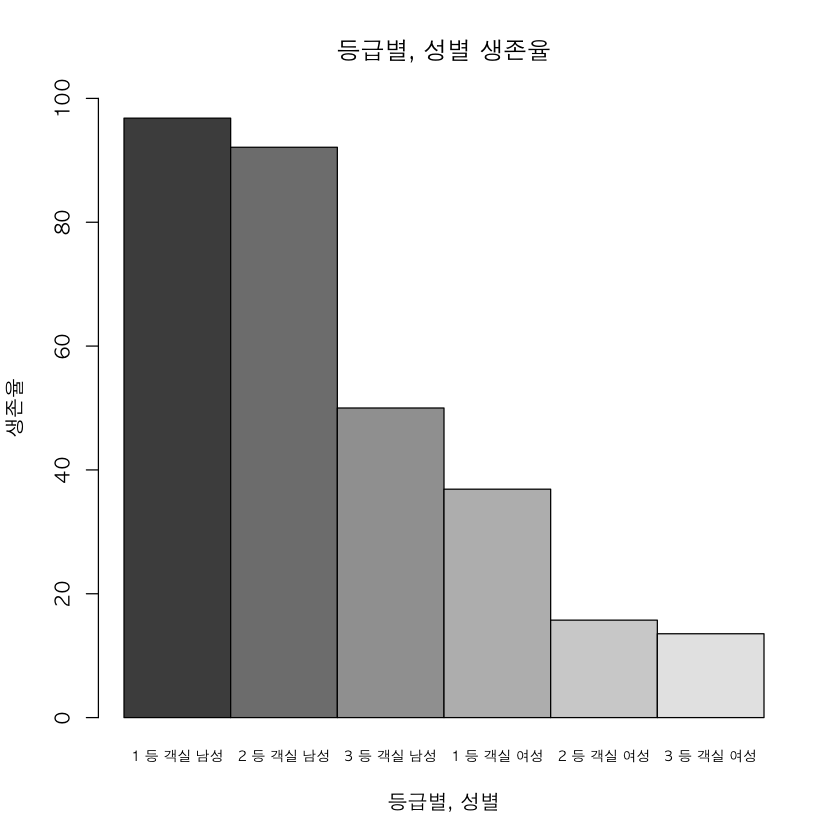

In [1819]:
# 객실 등급별 생존율 barplot으로 나타내기
par(family='AppleGothic')
barplot(as.matrix(pd),
  names=pe,
  cex.names=0.7,
  main='등급별, 성별 생존율',
  beside=T,
  xlab='등급별, 성별',
  ylab='생존율',
  ylim=c(0,100)
)

In [1725]:
table(train_df$Embarked)
unique(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

[1] S Q C  
Levels:  C Q S

In [1726]:
# 빈칸의 데이터 찾기
subset(train_df, Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [1727]:
# 제일 많은 운임을 지불한 사람
subset(train_df, Fare == max(train_df$Fare))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [1728]:
mean(train_df$Fare)

[1] 32.20421

In [1730]:
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정

# S항구 탑승인원
sum(train_df$Embarked=='S') # length는 안된다.
# C항구 탑승인원
sum(train_df$Embarked=='C')
# Q항구 탑승인원
sum(train_df$Embarked=='Q')


[1] 644

[1] 168

[1] 77

> 빈값 항구를 S항구로 변경, 제일 많은 항구니까..

In [1731]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [1732]:
# 빈칸 항구 찾기 1, subset
subset(train_df_T, Embarked == '')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [1733]:
# 빈칸 항구 찾기 2, 행렬, python
train_df_T[train_df_T$Embarked=="",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [1734]:
# 빈칸 항구를 S 항구로 변경하기 1, ifelse
train_df_T$Embarked <- ifelse(train_df_T$Embarked=='','S',train_df_T$Embarked)
subset(train_df_T, Embarked == '') # 적용됨

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [1735]:
# 빈칸 항구를 S항구로 변경하기 2, 행렬
train_df_T <- train_df
train_df_T[train_df_T$Embarked=='',]$Embarked <- 'S' # index 찾기
subset(train_df_T, Embarked == '') # 적용됨

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [1736]:
# 빈칸 항구를 S항구로 변경하기 3, 벡터
train_df_T <- train_df
train_df_T$Embarked[train_df_T$Embarked=='']<-'S'
subset(train_df_T, Embarked == '') # 적용됨

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [1737]:
train_df[train_df$Embarked=='',]$Embarked <- 'S' # index 찾기
subset(train_df, Embarked == '') # 적용됨
sum(train_df$Embarked=='S')

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


[1] 646

In [1738]:
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 555 516 625 730 29 841 683 840 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


        
           C   Q   S
  female  73  36 205
  male    95  41 441

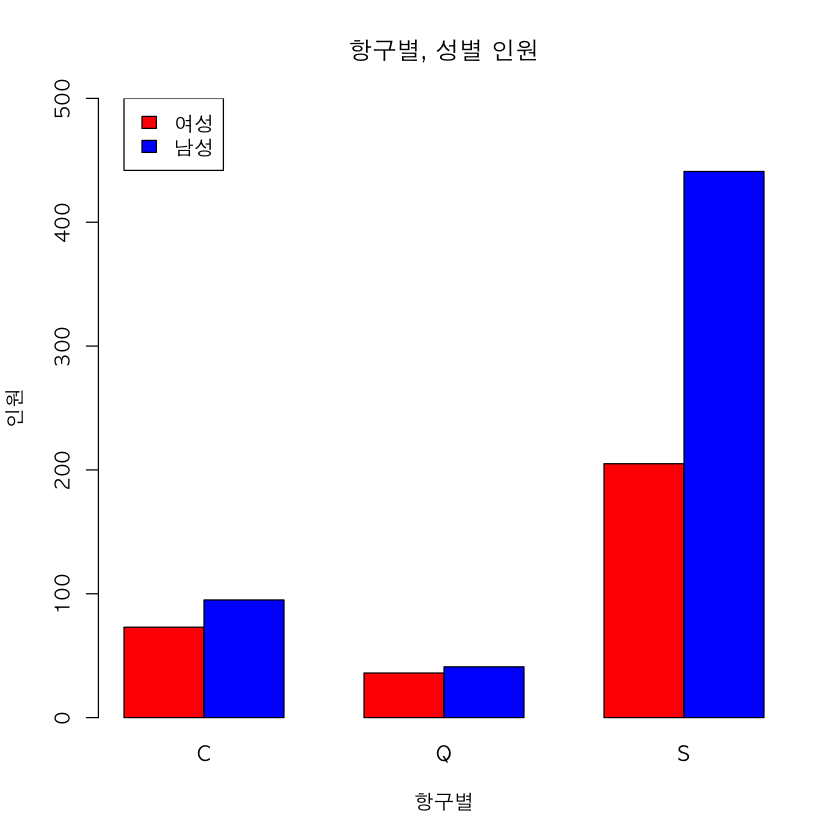

In [1790]:
# 항구별 성별 승선 인원
table(train_df$Sex, train_df$Embarked)
par(family='AppleGothic')
barplot(table(train_df$Sex, train_df$Embarked),
  beside=T,
  xlab='항구별',
  ylab='인원',
  ylim=c(0,500),
  col=c('red','blue'),
  main='항구별, 성별 인원',
)
legend(1, 500, # legend 박스 위치 좌표
    c('여성','남성'), # 각 그래프의 이름
    col = c('dark blue','dark green'), # 각 그래프의 색상
    fil=c('red','blue'),
    cex=1, # 박스 사이즈 줄이기(default=1)
) 


   
      C   Q   S
  0  75  47 427
  1  93  30 219

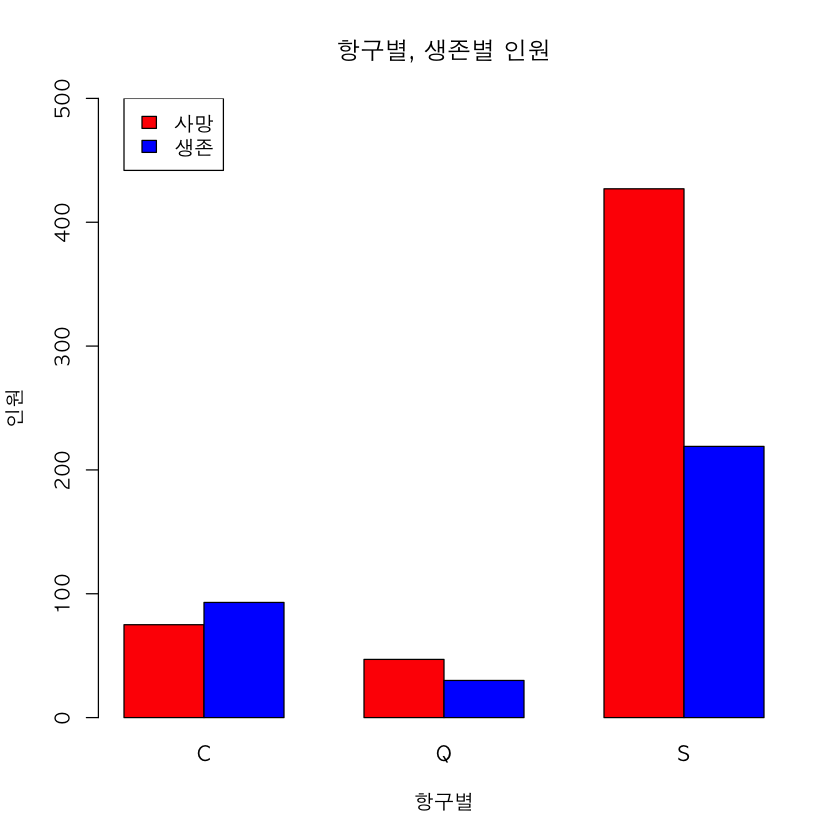

In [1789]:
# 항구별 생존별 인원
table(train_df$Survived, train_df$Embarked)
par(family='AppleGothic')
barplot(table(train_df$Survived, train_df$Embarked),
  beside=T,
  xlab='항구별',
  ylab='인원',
  ylim=c(0,500),
  main='항구별, 생존별 인원',
  col=c('red','blue'),
)

legend(1, 500, # legend 박스 위치 좌표
  c('사망','생존'), # 각 그래프의 이름
  fil=c('red','blue')
) 

   
      C   Q   S
  1  85   2 129
  2  17   3 164
  3  66  72 353

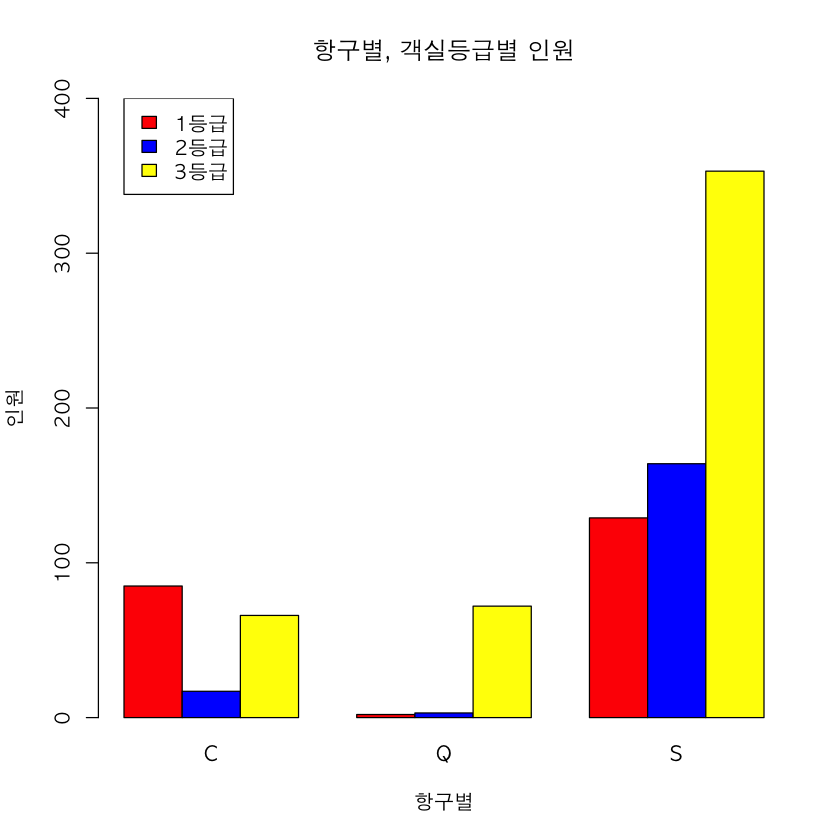

In [1792]:
# 항구별, 객실등급별 인원
table(train_df$Pclass,train_df$Embarked)
par(family='AppleGothic')
barplot(table(train_df$Pclass,train_df$Embarked),
  beside=T,
  col=c('red','blue','yellow'),
  main='항구별, 객실등급별 인원',
  ylim=c(0,400),
  xlab='항구별',
  ylab='인원',
)
legend(1,400,
  c('1등급','2등급','3등급'),
  fil=c('red','blue','yellow')
)

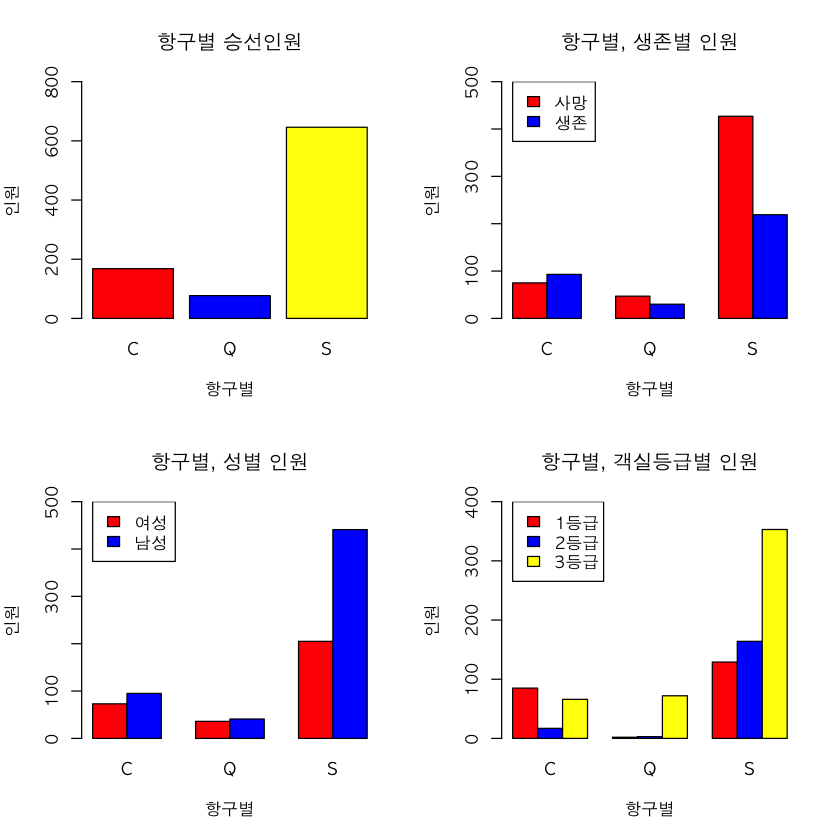

In [1829]:
# 4개 한눈에 보여주기
par(family="AppleGothic", mfrow=c(2,2))
barplot(table(train_df$Embarked),
  main='항구별 승선인원',
  ylim=c(0,800),
  ylab='인원',
  xlab='항구별',
  col=c('red','blue','yellow'),
)

barplot(table(train_df$Survived, train_df$Embarked),
  beside=T,
  xlab='항구별',
  ylab='인원',
  ylim=c(0,500),
  main='항구별, 생존별 인원',
  col=c('red','blue'),
)

legend(1, 500, # legend 박스 위치 좌표
  c('사망','생존'), # 각 그래프의 이름
  fil=c('red','blue')
) 

barplot(table(train_df$Sex, train_df$Embarked),
  beside=T,
  xlab='항구별',
  ylab='인원',
  ylim=c(0,500),
  col=c('red','blue'),
  main='항구별, 성별 인원',
)
legend(1, 500, # legend 박스 위치 좌표
    c('여성','남성'), # 각 그래프의 이름
    col = c('dark blue','dark green'), # 각 그래프의 색상
    fil=c('red','blue'),
    cex=1, # 박스 사이즈 줄이기(default=1)
) 

barplot(table(train_df$Pclass,train_df$Embarked),
  beside=T,
  col=c('red','blue','yellow'),
  main='항구별, 객실등급별 인원',
  ylim=c(0,400),
  xlab='항구별',
  ylab='인원',
)
legend(1,400,
  c('1등급','2등급','3등급'),
  fil=c('red','blue','yellow')
)

---
### Random Forest 예측모델 생성

In [1743]:
# 복사본
train_df_T <- train_df

In [1744]:
# 예측을 위한 컬럼 확인
target_col <- c('Survived',"Sex",'Pclass','Embarked')
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [1745]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex=='male'] <- 0
train_df_T$SexCode[train_df_T$Sex=='female'] <- 1

In [1746]:
# Sex column 삭제
train_df_T <- subset(train_df_T, select = -Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [1747]:
target_col <- c('Survived','SexCode','Pclass','Embarked')
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


# Embarked 숫자로 전환

C=0,S=1,Q=2 => 좋은 방법이 아니다. 2*s = q? s+s = q?

### One-Hot Encoding 방법
C==[1,0,0]
S==[0,1,0]
Q==[0,0,1]
처럼 행렬로 만들면 덧셈과 뺄셈에 각각 계산이 안전해진다.
R 내부적으로 1은 True, 0은 False


In [1748]:
train_df_T$Embarked_C = train_df_T$Embarked=='C'
train_df_T$Embarked_S = train_df_T$Embarked=='S'
train_df_T$Embarked_Q = train_df_T$Embarked=='Q'
head(train_df_T[c('Embarked','Embarked_C','Embarked_S','Embarked_Q')])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [1749]:
target_col=c('Survived','Pclass','SexCode','Embarked_C',"Embarked_S",'Embarked_Q','Age')
head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q,Age
0,3,0,FALSE,TRUE,FALSE,22
0,3,0,FALSE,TRUE,FALSE,35
0,3,0,FALSE,FALSE,TRUE,NA
0,1,0,FALSE,TRUE,FALSE,54
0,3,0,FALSE,TRUE,FALSE,2
0,3,0,FALSE,TRUE,FALSE,20


In [1750]:
train_data <- train_df_T[,target_col]

In [1751]:
library(caret)

### Sampling

In [1752]:
# Sampling
set.seed(1234)
samp2 <- createDataPartition(train_data2$Survived, p=0.7, list=F)
# 학습용
data.train.age <- train_data2[samp2,]
# 검증용
data.test.age <- train_data2[-samp2,]


In [1753]:
# Sampling
set.seed(1234)
samp <- createDataPartition(train_data$Survived, p=0.7, list=F)
# 학습용
data.train <- train_data[samp,]
# 검증용
data.test <- train_data[-samp,]


In [1754]:
summary(data.train.age)

    Survived        Pclass        SexCode      Embarked_C      Embarked_S     
 Min.   :0.00   Min.   :1.00   Min.   :0.000   Mode :logical   Mode :logical  
 1st Qu.:0.00   1st Qu.:1.00   1st Qu.:0.000   FALSE:409       FALSE:114      
 Median :0.00   Median :2.00   Median :0.000   TRUE :91        TRUE :386      
 Mean   :0.42   Mean   :2.24   Mean   :0.364                                  
 3rd Qu.:1.00   3rd Qu.:3.00   3rd Qu.:1.000                                  
 Max.   :1.00   Max.   :3.00   Max.   :1.000                                  
 Embarked_Q           Age       
 Mode :logical   Min.   : 0.75  
 FALSE:477       1st Qu.:20.00  
 TRUE :23        Median :29.00  
                 Mean   :29.59  
                 3rd Qu.:38.00  
                 Max.   :80.00  

In [1755]:
summary(data.train)

    Survived          Pclass         SexCode       Embarked_C     
 Min.   :0.0000   Min.   :1.000   Min.   :0.0000   Mode :logical  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:0.0000   FALSE:498      
 Median :0.0000   Median :3.000   Median :0.0000   TRUE :126      
 Mean   :0.3862   Mean   :2.277   Mean   :0.3574                  
 3rd Qu.:1.0000   3rd Qu.:3.000   3rd Qu.:1.0000                  
 Max.   :1.0000   Max.   :3.000   Max.   :1.0000                  
                                                                  
 Embarked_S      Embarked_Q           Age       
 Mode :logical   Mode :logical   Min.   : 0.75  
 FALSE:179       FALSE:571       1st Qu.:21.00  
 TRUE :445       TRUE :53        Median :29.00  
                                 Mean   :30.14  
                                 3rd Qu.:39.00  
                                 Max.   :80.00  
                                 NA's   :131    

In [1756]:
library(nnet)
library(party)
library(randomForest)
library(e1071)

In [1757]:
# 학습시키기
rf2 <- randomForest(Survived~., data=data.train.age, ntree=100,type=class)

In [1758]:
# 학습시키기
#rf <- randomForest(Survived~., data=data.train, ntree=100)

In [1759]:
# 문제 및 정답 만들기
x2 <- subset(data.test.age, select=-Survived)
y2 <- data.test.age$Survived

In [1760]:
# 문제 및 정답 만들기
x <- subset(data.test, select=-Survived)
y <- data.test$Survived

In [1761]:
# 검증하기
pred <- predict(rf,x)
head(pred)
# 0~1 값들만 보여주는 함수 Sigmoid, 0.5 기준으로 판단

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [1762]:
pred[pred <= 0.5] <- 0
pred[pred > 0.5] <- 1
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [1763]:
mean(pred==y)

[1] NA

In [1764]:
str(data.train.age)

'data.frame':	500 obs. of  7 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 2 3 1 1 2 1 3 ...
 $ SexCode   : num  0 0 0 0 1 0 0 0 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Age       : num  22 35 2 35 8 19 40 66 28 18 ...


---
### Survived를 factor로 변환 후에 randomForest 실행

In [1765]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)
data.train.age$Survived <- as.factor(data.train.age$Survived)
data.test.age$Survived <- as.factor(data.test.age$Survived)
str(data.train)

'data.frame':	624 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 1 3 2 3 3 1 3 ...
 $ SexCode   : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ Age       : num  22 35 NA 54 31 35 8 NA 19 NA ...


In [1766]:
x <- subset(data.test, select=-Survived)
y <- data.test$Survived
x2 <- subset(data.test.age, select=-Survived)
y2 <- data.test.age$Survived

In [1767]:
pred <- predict(rf,x)
pred <- predict(rf2,x2)

pred.nnet <- predict(model.nnet,x)
pred.ctree <- predict(model.ctree,x)
pred.nnet[pred.nnet <= 0.5] <- 0
pred.nnet[pred.nnet > 0.5] <- 1
pred.ctree[pred.ctree <= 0.5] <- 0
pred.ctree[pred.ctree > 0.5] <- 1

head(pred)



3         5         6         7         8         9 
0.3386578 0.1298214 0.1450456 0.5034350 0.1904696 0.5824528

In [1557]:
mean(pred==y)
table(pred,y)

[1] 0

ERROR: Error in table(pred, y): all arguments must have the same length


In [1768]:
head(train_data)
train_data2 <- subset(train_data, !is.na(train_data$Age)) # train_data2 : age na 값 제외
rownames(train_data2) <- c()
# 표준화
train_data3 <- scale(train_data2)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q,Age
0,3,0,FALSE,TRUE,FALSE,22
0,3,0,FALSE,TRUE,FALSE,35
0,3,0,FALSE,FALSE,TRUE,NA
0,1,0,FALSE,TRUE,FALSE,54
0,3,0,FALSE,TRUE,FALSE,2
0,3,0,FALSE,TRUE,FALSE,20


In [1769]:
# Sampling
set.seed(1234)
samp2 <- createDataPartition(train_data2$Survived, p=0.7, list=F)
# 학습용
data.train.age <- train_data2[samp2,]
# 검증용
data.test.age <- train_data2[-samp2,]
head(data.train.age)
nrow(data.train.age)


,Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q,Age
1,0,3,0,FALSE,TRUE,FALSE,22
2,0,3,0,FALSE,TRUE,FALSE,35
4,0,3,0,FALSE,TRUE,FALSE,2
10,0,2,0,FALSE,TRUE,FALSE,35
11,0,3,1,FALSE,TRUE,FALSE,8
12,0,1,0,FALSE,TRUE,FALSE,19


[1] 500

In [1770]:
# 문제 및 정답
x2 <- subset(data.test.age, select=-Survived)
y2 <- data.test.age$Survived

### 인공신경망, 딥러닝


In [1771]:
# 학습하기
nnet <- nnet(Survived~.,data=data.train.age, size=2)

# 검증하기
pred.nnet <- predict(nnet, x2)
pred.nnet[pred.nnet <= 0.5] <- 0
pred.nnet[pred.nnet > 0.5] <- 1

# 예측율  
mean(pred.nnet == y2)
table(pred.nnet,y2)

# weights:  17
initial  value 122.161703 
iter  10 value 118.888910
iter  20 value 74.916768
iter  30 value 66.112548
iter  40 value 63.771138
iter  50 value 63.027179
iter  60 value 62.938575
iter  70 value 62.645726
iter  80 value 62.321283
final  value 62.320728 
converged


[1] 0.7757009

         y2
pred.nnet   0   1
        0 107  21
        1  27  59

### 다항 로지스틱 회귀분석

In [1772]:
# 학습하기
mul <- multinom(Survived~., data=data.train.age)

# 검증하기
pred.mul <- predict(mul, x2)
pred.mul[pred.mul <= 0.5] <- 0
pred.mul[pred.mul > 0.5] <- 1

# 예측율  
mean(pred.mul == y2)
(table(pred.mul,y2))


# weights:  8 (7 variable)
initial  value 346.573590 
iter  10 value 220.118120
final  value 219.962059 
converged


[1] 0.7616822

        y2
pred.mul   0   1
       0 105  22
       1  29  58

### random forest

In [1773]:
# 학습시키기
rf2 <- randomForest(Survived~., data=data.train.age, ntree=100, type=class)

# 검증하기
pred.rf <- predict(rf2,x2)
pred.rf[pred.rf <= 0.5] <- 0
pred.rf[pred.rf > 0.5] <- 1

# 예측율
mean(pred.rf==y2)
table(pred.rf,y2)

[1] 0.7990654

       y2
pred.rf   0   1
      0 111  20
      1  23  60

### ctree

In [1774]:
  # 학습하기
  ctree <- ctree(Survived~.,data=data.train.age)

  # 검증하기
  pred.ctree <- predict(ctree, x2)
  pred.ctree[pred.ctree <= 0.5] <- 0
  pred.ctree[pred.ctree > 0.5] <- 1

  # 예측율
  mean(pred.ctree == y2)
  table(pred.ctree,y2)

[1] 0.7803738

          y2
pred.ctree   0   1
         0 106  19
         1  28  61

### SVM

In [1775]:
svmF <- function(q){
  result = 0
  for(i in 1:q){
    # 학습하기
    svm = svm(Survived~., data=data.train.age)

    # 검증하기
    pred.svm <- predict(svm, x2)
    pred.svm[pred.svm <= 0.5] <- 0
    pred.svm[pred.svm > 0.5] <- 1

    # 예측율
    #mean(pred.svm == y2)
    result <- (result + mean(pred.svm == y2))

    #table(pred.svm,y2)
    #result2 = (result2 + table(pred.svm,y2))
  }
return(result/q)
}

In [1776]:
final <- data.frame(Age예측력=c(mean(pred.nnet == y2),mean(pred.ctree == y2),mean(pred.rf==y2),mean(pred.svm == y2),mean(pred.mul == y2)))
rownames(final) <- c('인공신경망','의사결정나무','RandomForest','SVM','로지스틱회귀분석')
final

,Age예측력
인공신경망,0.7757009
의사결정나무,0.7803738
RandomForest,0.7990654
SVM,0.7570093
로지스틱회귀분석,0.7616822


In [1777]:
svmF(10)

[1] 0.7570093